# Analyse et Conclusion du Projet de Détection de Pneumonie

Ce notebook présente une analyse complète des résultats obtenus à travers les quatre notebooks précédents, dont l'objectif était de développer un modèle de détection automatique de pneumonie à partir de radiographies pulmonaires.

## Objectifs du projet

- Analyser et comprendre un dataset de radiographies pulmonaires
- Prétraiter les images pour standardiser les caractéristiques
- Extraire des caractéristiques statistiques pertinentes
- Entraîner un modèle Random Forest pour la classification
- Optimiser les performances par fine-tuning et cross-validation
- Évaluer et comparer différentes approches

## Notebook 1: Analyse et Exploration des Images

### Principales découvertes:

- Dataset original déséquilibré: 73% pneumonie vs 27% normal
- Grande variabilité des dimensions (4803 tailles différentes)
- 95.2% des images en niveaux de gris, 4.8% en RGB
- Différences statistiques entre les classes:
  - Images normales: plus de contraste (61.27 vs 55.41)
  - Images pneumonie: plus de variabilité entre images
- Distribution: Train (89%), Test (10.7%), Validation (0.3%)

### Implications:

Ces observations ont justifié la nécessité d'un prétraitement approfondi pour standardiser les images et rééquilibrer les classes.

## Notebook 2: Prétraitement des Images

### Transformations appliquées:
- Redimensionnement uniforme à 256×256 pixels
- Conversion en niveaux de gris
- Normalisation des valeurs de pixels
- Augmentation des données pour équilibrer les classes
- Redistribution selon la proportion 80/10/10

### Résultats:
- Dataset prétraité parfaitement équilibré (50/50)
- Conservation de toutes les images originales
- Génération de 2690 images augmentées pour équilibrer
- Distribution finale: 8546 images (4273 par classe)
- Préservation des différences statistiques clés entre classes

## Notebook 3: Entraînement du Modèle Random Forest

### Approche:

- Extraction de 13 caractéristiques statistiques par image
  - 5 statistiques globales (moyenne, écart-type, min, max, médiane)
  - 8 statistiques par quadrant (moyenne et écart-type par région)
- Entraînement d'un modèle Random Forest avec paramètres par défaut

### Résultats:

- Entraînement rapide (~1.7 secondes)
- Performances sur la validation:
  - Accuracy: 81.73%
  - Precision: 85.01%
  - Recall: 77.05%
  - F1 Score: 80.84%
- Matrice de confusion:
[[369  58]
[ 98 329]]

## Notebook 4: Fine-tuning et Cross-validation

### Phase 1: Optimisation des hyperparamètres

- GridSearchCV avec validation croisée à 5 plis
- Meilleurs paramètres: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
- Performance du modèle optimisé:
  - Train: 100% (surapprentissage extrême)
  - Validation: 80.68%
  - Test: 82.36%

### Phase 2: Réduction du surapprentissage

- Modèle contraint: max_depth=10, min_samples_leaf=5
- Performances:
  - Train: 87.73% (surapprentissage réduit)
  - Validation: 79.86%
  - Test: 81.89%
- Écart train-test réduit de 17.64% à 5.83%

## Comparaison des Modèles

| Modèle | Train | Validation | Test | Écart Train-Test |
|--------|-------|------------|------|------------------|
| Base | ? | 81.73% | ? | ? |
| Fine-tuné | 100% | 80.68% | 82.36% | 17.64% |
| Contraint | 87.73% | 79.86% | 81.89% | 5.83% |

La comparaison révèle que:
1. Les trois modèles ont des performances très similaires sur les données de test (~82%)
2. Le modèle fine-tuné présente un surapprentissage extrême (100% sur train)
3. Le modèle contraint offre le meilleur équilibre entre performance et généralisation

## Notebook 5: HOG et LBP

HOG (Histogram of Oriented Gradients) : Capture des contours et structures à travers des histogrammes d'orientation de gradients
LBP (Local Binary Patterns) : Détection des textures locales via des motifs binaires de voisinage
Amélioration spectaculaire : Accuracy de 94.63% sur test avec la combinaison HOG+LBP
Réduction d'erreur : Diminution de plus de 70% du taux d'erreur par rapport à l'approche statistique

L'amélioration spectaculaire de performance s'explique par les facteurs suivants :

Richesse d'information : HOG et LBP extraient des caractéristiques locales et structurelles beaucoup plus riches que les simples statistiques. Ils capturent les motifs et textures spécifiques associés aux infiltrats pneumoniques.
Complémentarité des approches : HOG excelle dans la détection des contours et formes, tandis que LBP capture efficacement les variations de texture. Cette complémentarité fournit une représentation plus complète des anomalies pulmonaires.
Préservation des informations spatiales : Contrairement aux statistiques globales, ces descripteurs préservent l'information sur la localisation des caractéristiques, essentielle pour distinguer les opacités pathologiques.
Robustesse aux variations : Ces descripteurs sont intrinsèquement plus robustes aux variations d'intensité et d'échelle, ce qui est crucial pour l'analyse de radiographies acquises dans différentes conditions.

## Conclusion

Notre progression montre l'importance cruciale du choix des caractéristiques en apprentissage automatique classique. Même avec le même algorithme (Random Forest), le passage de statistiques simples à des descripteurs avancés comme HOG et LBP a permis un bond spectaculaire de performance.
Le modèle final combinant HOG et LBP atteint une précision de 94.63%, atteignant les performances de certaines approches de deep learning tout en gardant l'avantage de la rapidité d'entraînement et de l'interprétabilité.

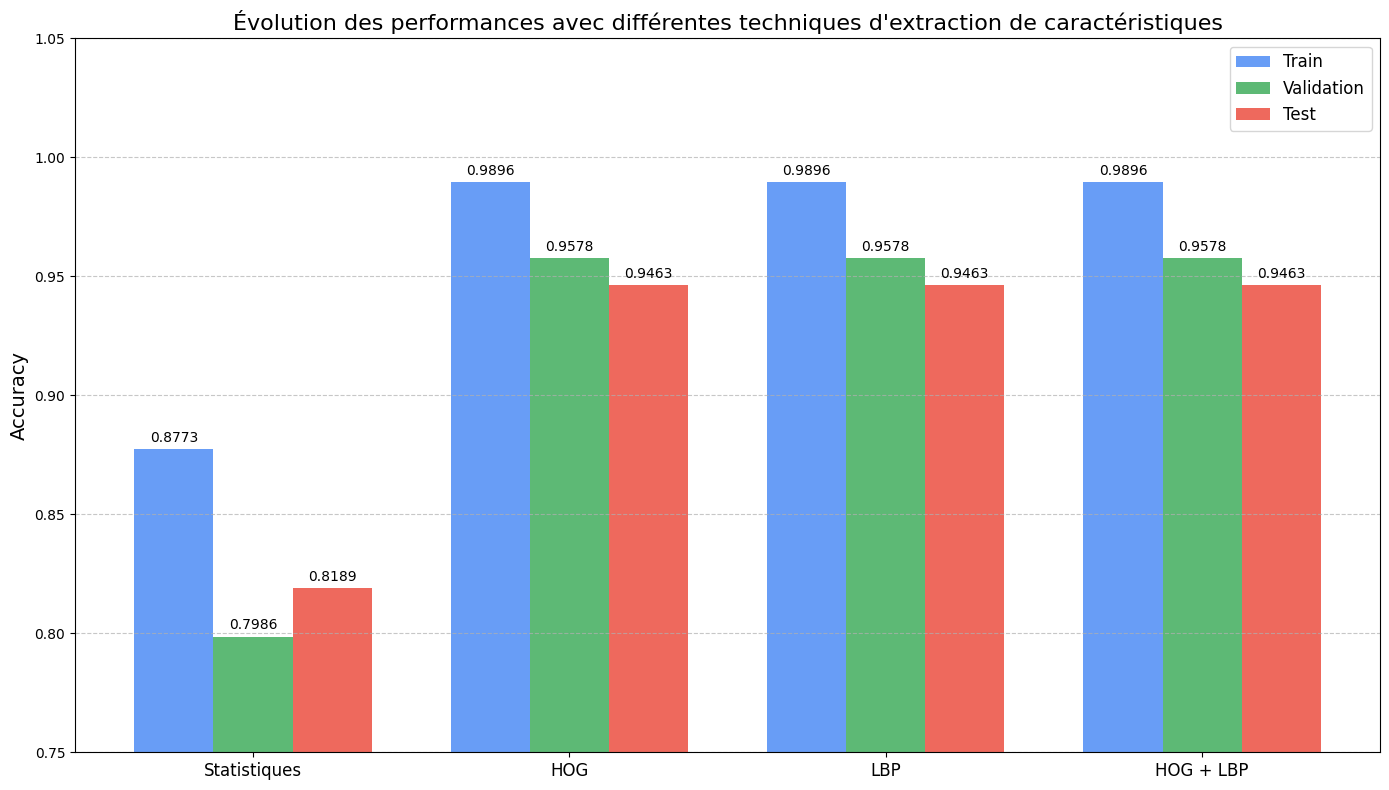

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.ticker import FormatStrFormatter

models = ['Statistiques', 'HOG', 'LBP', 'HOG + LBP']
val_scores = [0.7986, 0.9578, 0.9578, 0.9578]
test_scores = [0.8189, 0.9463, 0.9463, 0.9463]
train_scores = [0.8773, 0.9896, 0.9896, 0.9896]

fig, ax = plt.subplots(figsize=(14, 8))

x = np.arange(len(models))
width = 0.25

rects1 = ax.bar(x - width, train_scores, width, label='Train', color='#4285F4', alpha=0.8)
rects2 = ax.bar(x, val_scores, width, label='Validation', color='#34A853', alpha=0.8)
rects3 = ax.bar(x + width, test_scores, width, label='Test', color='#EA4335', alpha=0.8)

ax.set_ylabel('Accuracy', fontsize=14)
ax.set_title('Évolution des performances avec différentes techniques d\'extraction de caractéristiques', fontsize=16)
ax.set_xticks(x)
ax.set_xticklabels(models, fontsize=12)
ax.legend(fontsize=12)
ax.set_ylim(0.75, 1.05)
ax.grid(axis='y', linestyle='--', alpha=0.7)
ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))

def autolabel(rects, scores):
    for i, (rect, score) in enumerate(zip(rects, scores)):
        ax.annotate(f'{score:.4f}',
                    xy=(rect.get_x() + rect.get_width() / 2, score),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom',
                    fontsize=10)

autolabel(rects1, train_scores)
autolabel(rects2, val_scores)
autolabel(rects3, test_scores)

plt.tight_layout()
plt.show()